<a href="https://colab.research.google.com/github/mbaishnavee05/EDA-Telecom-churn-analysis/blob/main/EDA_telecom_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of churn dataset


# ***Problem Statement***

## **Orange S.A.,formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.**
## **Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

# ***Mounting the google drive and fetching Data_set and Importing required libraries and Modules***

In [1]:
# Connecting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [3]:
# fetching datset of telecom churn
churn_data=pd.read_csv("/content/drive/MyDrive/Telecom Churn.csv")

# ***Understanding the Data***

In [4]:
# variable data types
churn_data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [5]:
# This Display first 5 rows
churn_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Checking last 5 rows.
churn_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
#size and shape of dataframe
#this returns a tuple representing the size and shape of the Dataframe.
churn_data.shape

(3333, 20)

In [8]:
# Detailed Information about the telecom churn dataset.
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# ***Looking for Null/Missing values***

In [9]:
''' To Checking the sum of Missing/null values,if present any we can replace or 
delete those null value'''
churn_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No null value present in the churn data

In [10]:
# Churn dataset Descriptive Analysis
churn_data.describe() 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# ***Churn - number of customers who leave a company/service/subscription during a given period***

In [11]:
churn_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

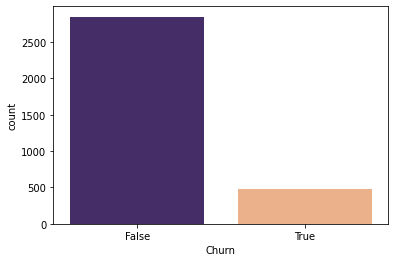

In [12]:
# graphical representation of churn count from given data
sns.countplot(x = churn_data['Churn'], palette=['#432371',"#FAAE7B"])

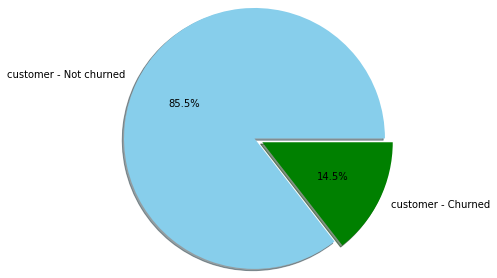

In [13]:
#churn column in percentage using pie chart
c_data = churn_data['Churn'].value_counts()
explode = (0, 0.1)
plt.pie(c_data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 1.5, 
        labels = ['customer - Not churned','customer - Churned'],
        colors=['skyblue' ,'green'])
circle = plt.Circle( (0,0), 1, color='orange')


##  we can see that 14.5% of customers have churned. 

# ***States & Area code***

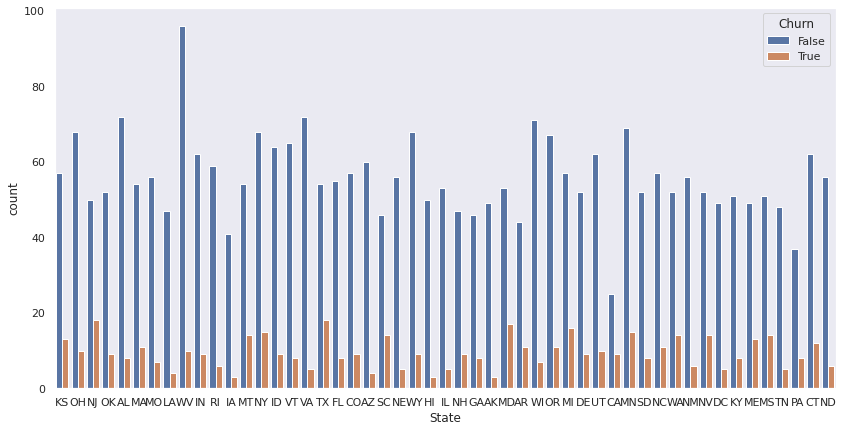

In [14]:
# statewise analysis of churned customer data 
sns.set(style="dark")                                                    
plt.figure(figsize=(14,7))
ax = sns.countplot(x='State', hue="Churn", data=churn_data)
plt.show()

In [15]:
# lets check the percentage of statewise customer churn
Statewise_data = pd.crosstab(churn_data["State"],churn_data["Churn"])
Statewise_data['Churn_Percentage'] = Statewise_data.apply(lambda x : x[1]*100/(x[0]+x[1]),
                                         axis = 1)
print(Statewise_data)

Churn  False  True  Churn_Percentage
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

## States ==> CA, NJ, TX, MD, SC, MI  are having churn rate of higher than 21.

As we can observe here that not all state have same churn rate , so package price/charges are not the major factor . The reason for churn rate from a particular state may be due to the low coverage of the cellular network.

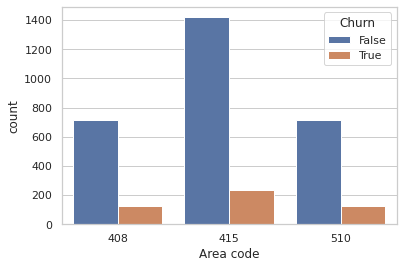

In [16]:
# analysis of churn based on areacode
sns.set(style="whitegrid")
ax = sns.countplot(x='Area code',data=churn_data, hue="Churn")
plt.show()

### As we can notice here that churn rate is approximately same. so, it is not easy to identify relation between them.

# ***Account length Analysis***

In [17]:
#creating separate dataset for churned and not churned customer
churnd_cust_data = churn_data[churn_data["Churn"] == bool(True)]
not_churnd_cust_data = churn_data[churn_data["Churn"] == bool(False)]

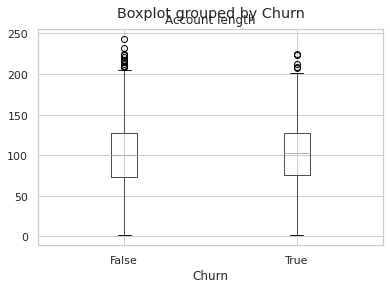

In [18]:
# implying Box Plot for Account Length variable 
churn_data.boxplot(column='Account length',by='Churn')

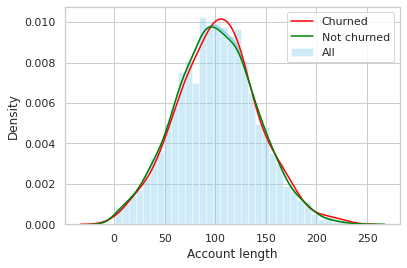

In [19]:
#comparing of not churned account length and  churned account length 
sns.distplot(churn_data['Account length'],color = 'skyblue',label="All")
sns.distplot(churnd_cust_data['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churnd_cust_data['Account length'],color = 'green',hist= False,
             label="Not churned")
plt.legend()

### From above chart and analysis we can't find any relation between churn column and account length 

# ***International plan Analysis***

In [20]:
# counting of customer c with and without international plan
churn_data['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

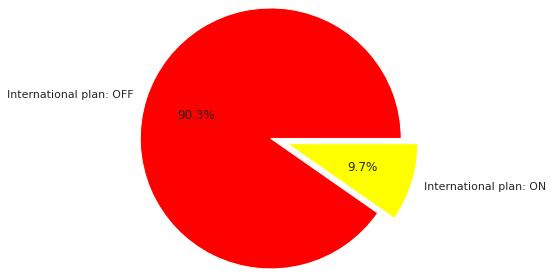

In [21]:
#  percenteage of customer with international plan ON/OFF using pie chart
data = churn_data['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',radius = 1.5, 
        labels = ['International plan: OFF','International plan: ON'],
        colors=['red' ,'yellow'])
circle = plt.Circle( (0,0), 1, color='white')

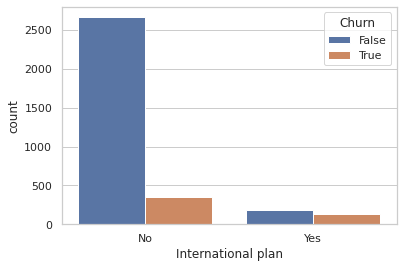

In [22]:
#Analysing by International plan
sns.countplot(x='International plan',hue="Churn",data = churn_data)

In [23]:
# percentage of customer who churned with respect to total no of cusmtomers witn international plan ON & OFF
International_plan = pd.crosstab(churn_data["International plan"],churn_data["Churn"])
International_plan['Churn_%'] = International_plan.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)


print(International_plan)

Churn               False  True    Churn_%
International plan                        
No                   2664   346  11.495017
Yes                   186   137  42.414861



## As per analysis out of customer with international plan 42.4% customer churn.  This might be due to excessive rates or network difficulties; as we know, customers already pay more for international calls than local calls; if they have network issues, they are certain to be dissatisfied, hence churn may occur.

# ***Voice mail plan analysis***

In [24]:
#churn rate for customer with and without voice mail paln
voicemail = pd.crosstab(churn_data["Voice mail plan"],churn_data["Churn"])
voicemail['Churn_%'] = voicemail.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(voicemail)

Churn            False  True    Churn_%
Voice mail plan                        
No                2008   403  16.715056
Yes                842    80   8.676790


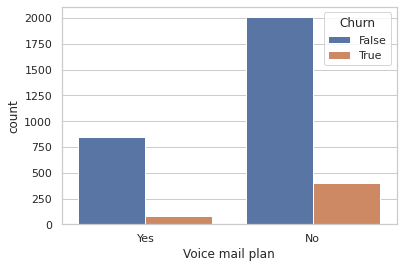

In [25]:
''' [pictorial Analysis of churned and non churned customer with respect to customer with voice 
mail plan ''' 
sns.countplot(x='Voice mail plan',hue="Churn",data = churn_data)

From the above analysis we can say that, no proper relation has been found between the customers with voicemail plan vs. people who churned.

# ***Analysis - Number voicemail messages***

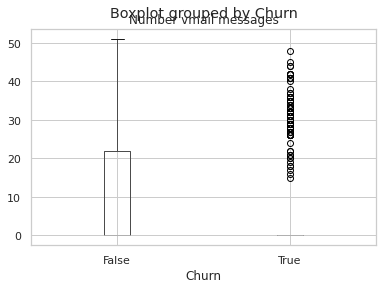

In [26]:
churn_data.boxplot(column='Number vmail messages', by='Churn')
plt.show()       

In [27]:
#from above boxplot its not easy to interpret the no. of voice mails Vs. churned customers values
# using describe method we will look in detail.   
churnd_cust_data = churn_data[churn_data["Churn"] == bool(True)]
churnd_cust_data['Number vmail messages'].mean()
churnd_cust_data['Number vmail messages'].describe()

count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64

In [28]:
not_churnd_cust_data = churn_data[churn_data["Churn"] == bool(False)]
not_churnd_cust_data['Number vmail messages'].describe()

count    2850.000000
mean        8.604561
std        13.913125
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max        51.000000
Name: Number vmail messages, dtype: float64

 From the above boxplot we can understand that churned customer has less no. of voice mail compared to the not churned ones.



# ***Analysis on Call Minutes and Call Charges***

In [29]:
# implying Correlation Plot 
corr= churn_data.corr()
corr.style.background_gradient(cmap='cividis').set_precision(2)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.00,-0.01,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
Area code,-0.01,1.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03,0.01
Number vmail messages,-0.00,-0.00,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
Total day minutes,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
Total day calls,0.04,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
Total day charge,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
Total eve minutes,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
Total eve calls,0.02,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01
Total eve charge,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
Total night minutes,-0.01,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.00,-0.01,1.00,0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.04


.

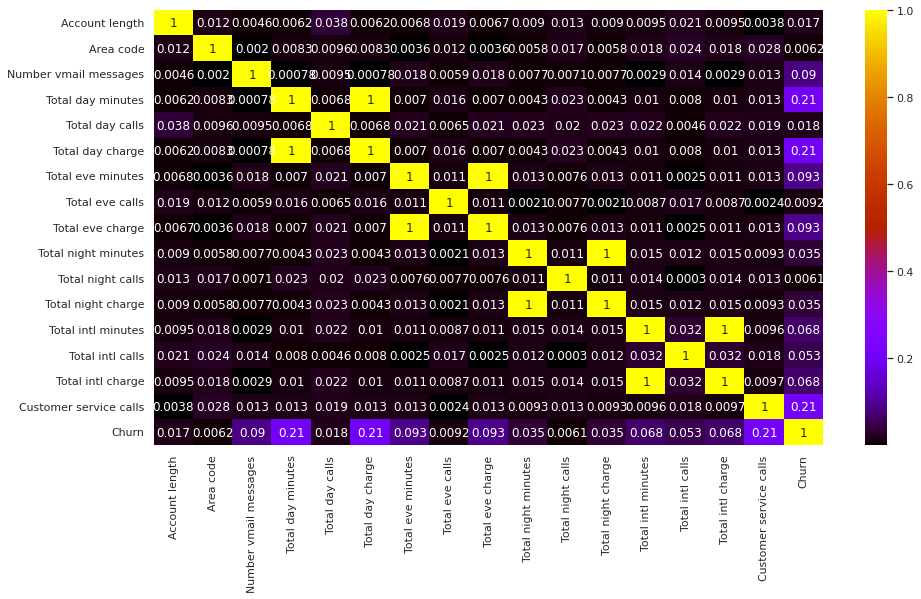

In [30]:
# as you seen the above graph, which can also be diplayed in more detailed and colourful way by below code
plt.figure(figsize=(15,8))
churn_heatmap=churn_data.corr()
sns.heatmap(abs(churn_heatmap),cmap="gnuplot",annot=True)


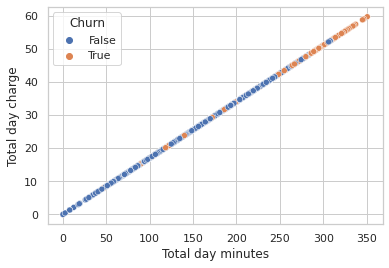

In [31]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn",
                data=churn_data)

 There is linear relationship present between Minutes and it's corresponding Charges, we can notice that most of the churned customer seems to have spent more minute on call.

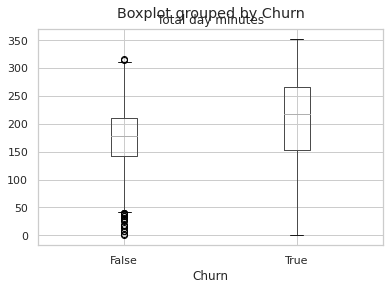

In [32]:
 # Box Plot - Total day minutes are grouped by Churn
churn_data.boxplot(column='Total day minutes',by='Churn')
plt.show()

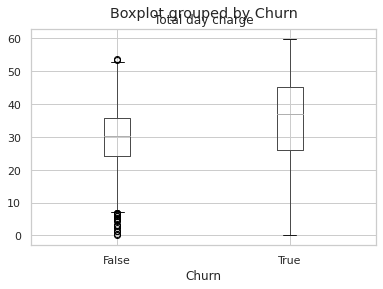

In [33]:
# Box Plot for Customer service calls attribute 
churn_data.boxplot(column='Total day charge',by='Churn')

## Since total day charge is directly proportional to total day minute  , as the day minutes increases total charge increases , we can say that churned customers are the ones with higher total day minutes and charges .


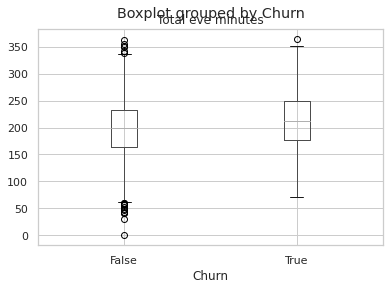

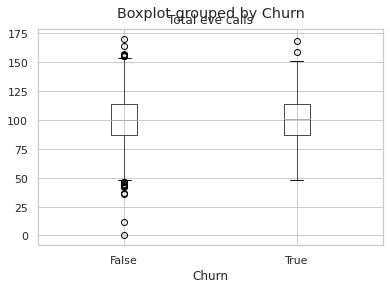

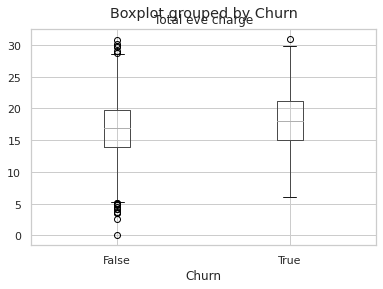

In [34]:
# for no. of calls, and charges evening minutes.
churn_data.boxplot(column='Total eve minutes',by='Churn')
churn_data.boxplot(column='Total eve calls',by='Churn')
churn_data.boxplot(column='Total eve charge',by='Churn')

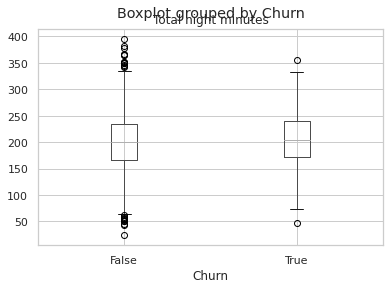

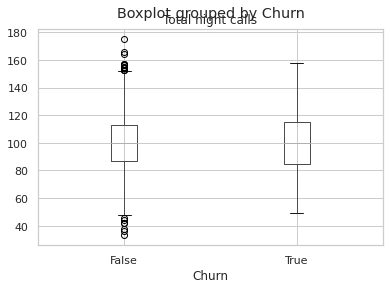

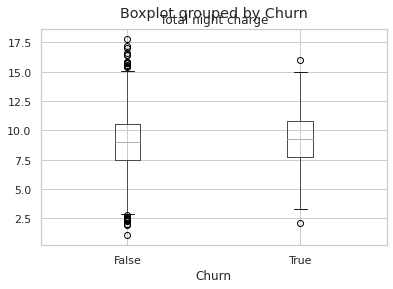

In [35]:
# for no. of calls, charges, Night minutes ,  .
churn_data.boxplot(column='Total night minutes',by='Churn')
churn_data.boxplot(column='Total night calls',by='Churn')
churn_data.boxplot(column='Total night charge',by='Churn')

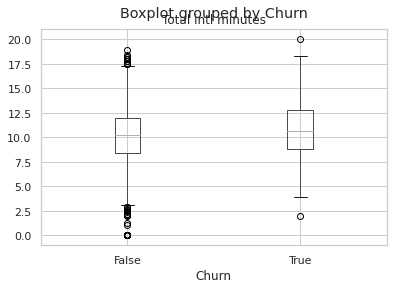

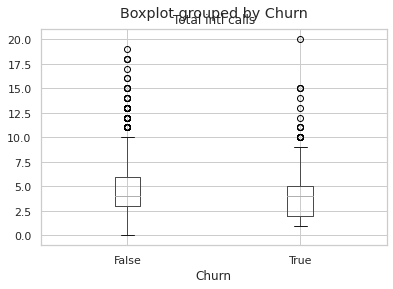

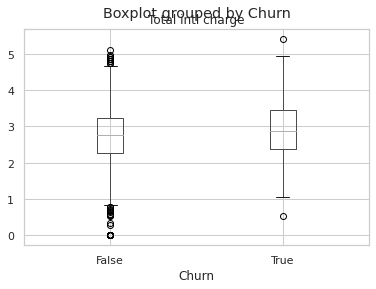

In [36]:
#for NO. of calls ans charges, international minutes, 
churn_data.boxplot(column='Total intl minutes',by='Churn')
churn_data.boxplot(column='Total intl calls',by='Churn')
churn_data.boxplot(column='Total intl charge',by='Churn')

<Figure size 1224x72 with 0 Axes>

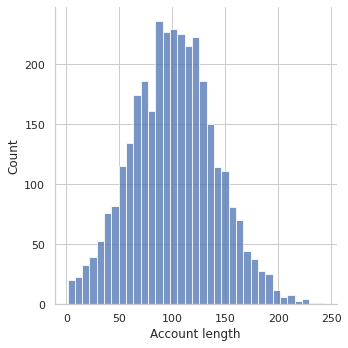

<Figure size 1224x72 with 0 Axes>

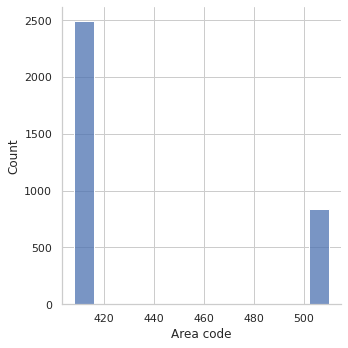

<Figure size 1224x72 with 0 Axes>

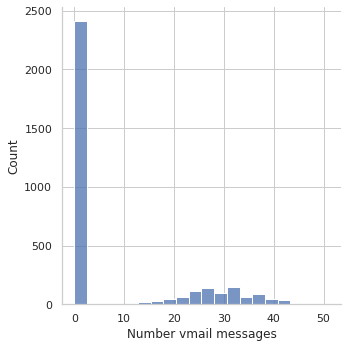

<Figure size 1224x72 with 0 Axes>

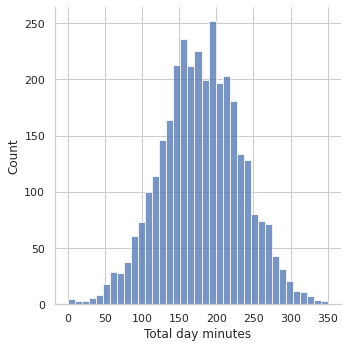

<Figure size 1224x72 with 0 Axes>

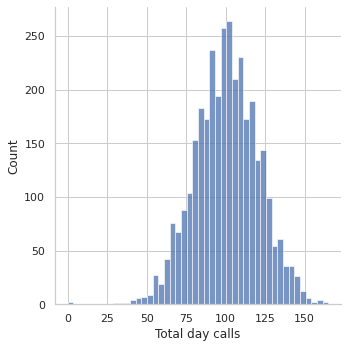

<Figure size 1224x72 with 0 Axes>

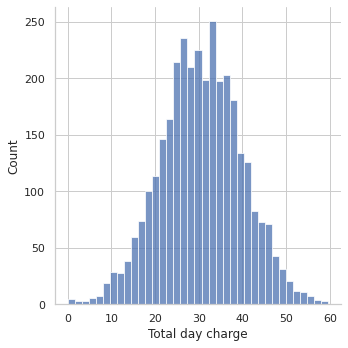

<Figure size 1224x72 with 0 Axes>

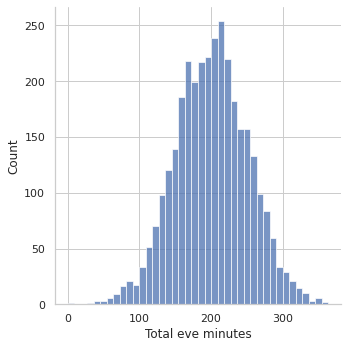

<Figure size 1224x72 with 0 Axes>

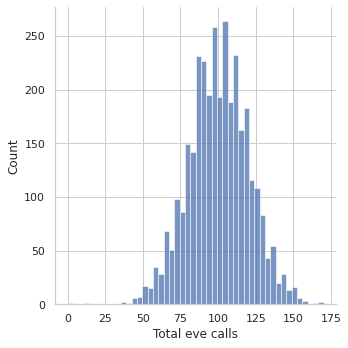

<Figure size 1224x72 with 0 Axes>

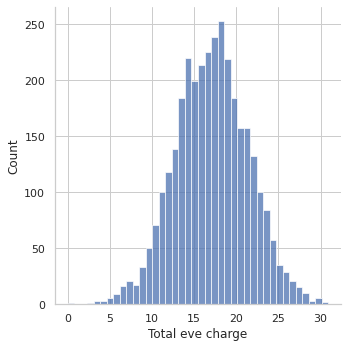

<Figure size 1224x72 with 0 Axes>

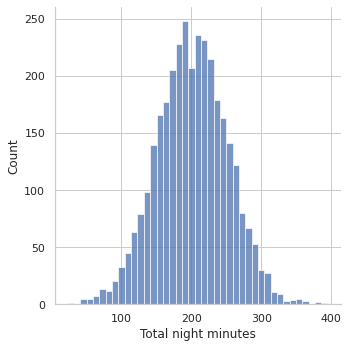

<Figure size 1224x72 with 0 Axes>

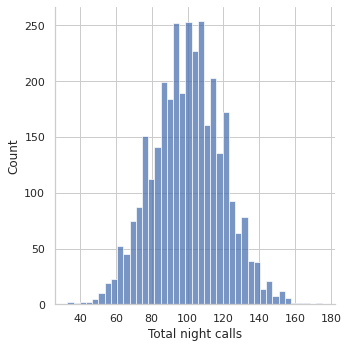

<Figure size 1224x72 with 0 Axes>

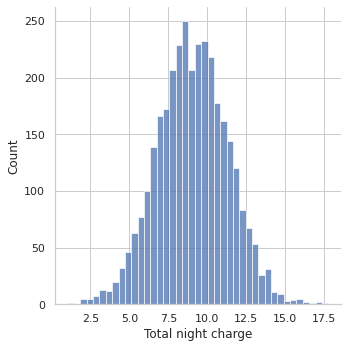

<Figure size 1224x72 with 0 Axes>

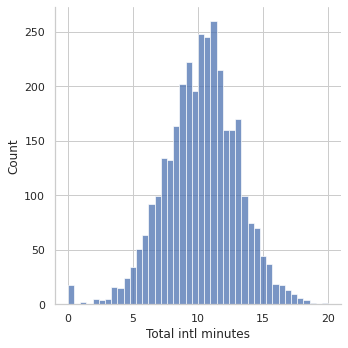

<Figure size 1224x72 with 0 Axes>

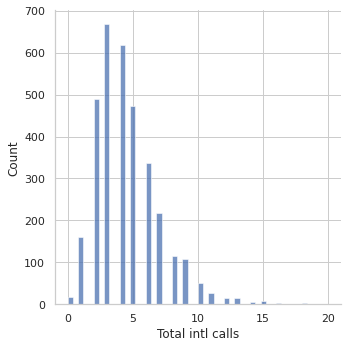

<Figure size 1224x72 with 0 Axes>

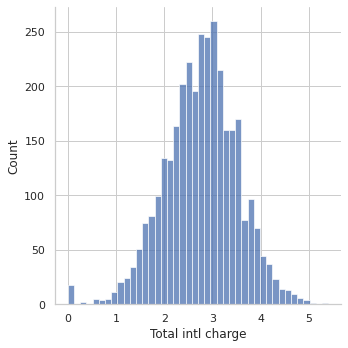

<Figure size 1224x72 with 0 Axes>

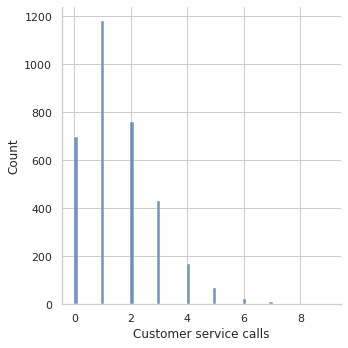

In [37]:
c=churn_data.select_dtypes(exclude=['object','bool'])
for column in c:
        plt.figure(figsize=(17,1))
        sns.displot(data=c, x=column)
plt.show()

.

# ***Charges for Each different minutes with respect to Day, Eve, Night, intl calculated***

In [38]:
#calculate charges for each kind of mins:
day_min_charges = churn_data['Total day charge'].mean()/churn_data['Total day minutes'].mean()
eve_min_charges = churn_data['Total eve charge'].mean()/churn_data['Total eve minutes'].mean()
night_min_charges = churn_data['Total night charge'].mean()/churn_data['Total night minutes'].mean()
int_min_charges= churn_data['Total intl charge'].mean()/churn_data['Total intl minutes'].mean()

In [39]:
print(f' Day_min_charge: {day_min_charges} \n eve_min_charge: {eve_min_charges} \n night_min_charge: {night_min_charges } \n int_min_charge: {int_min_charges}')

 Day_min_charge: 0.17000300739130672 
 eve_min_charge: 0.08500104871485778 
 night_min_charge: 0.04500041448440008 
 int_min_charge: 0.2700500279887107


.

# ***Analysis of Customer service calls***

In [40]:
# Analysis Customer Service Calls 
pd.crosstab(churn_data['Churn'], churn_data["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


In [41]:
#finding churn w.r.t no .of customer service calls.
Cust_serv = pd.crosstab(churn_data['Customer service calls'],churn_data["Churn"])
Cust_serv['Churn_%'] = Cust_serv.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Cust_serv)

Churn                   False  True     Churn_%
Customer service calls                         
0                         605    92   13.199426
1                        1059   122   10.330229
2                         672    87   11.462451
3                         385    44   10.256410
4                          90    76   45.783133
5                          26    40   60.606061
6                           8    14   63.636364
7                           4     5   55.555556
8                           1     1   50.000000
9                           0     2  100.000000


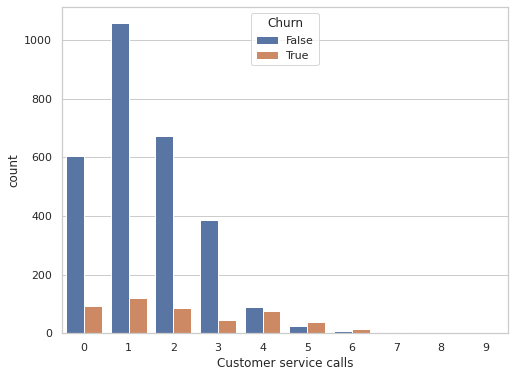

In [42]:
# Customer Serice calls grouped by churn using histogram
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Customer service calls", hue='Churn', data=churn_data);

## Customers who called customer service less than 3 times have a lower churn rate than that of customers who have called customer service 4 or more times.

# ***CONCLUSION:***

##* Customers with international plan active has higher churn rate compared to customers without international plan , reasons may be because the customers are unhappy with the higher tariff charges or network problems.

##* Area and Account length have no relation with churn, hence this columns can be deleted or it can be said that the data is redundant.

##* Few states have higher churn compared to others,  for which network problems may be reason or competitors offering low tariff.

## * Call to the service center increases propotionally churn rate increases.Customers who called customer service less than 3 times have a lower churn rate than that of customers who have called customer service 4 or more times. 

##* Customers with higher day call mins has higher churn rate compared to other , could be because of the higher charges which is quite obvious.



 



# ***Reccomendations :***

##* Improvement in coverage area and solving network issues. 

##* Give discount or create a plan or allow customixed plans.

##* Lower the international plan tariff or some discounts.

##* Provide better customer service and problem solution, also take their feedback and work on the feedback suggested by the customers
